In [2]:
%load_ext autoreload
%autoreload 2

from ETL import *
from yahist import Hist1D

from yahist.fit import fit_hist
from yahist.utils import ignore_division_errors
import scipy
import os
import mplhep as hep
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib import style
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
style.use('seaborn-white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
df_original_front = pd.read_csv('data/Face 1.txt',sep='\t')
df_original_back = pd.read_csv('data/Face 2 and 4 new original.txt')

df_original_back.head()

df_config_3_front = pd.read_csv('new_configs/Face 1 and 3_4')
df_config_3_back = pd.read_csv('new_configs/Face 2 and 4_4')
# df_original_back = df_original_back.loc[df_original_back['Module '] != 754]

In [4]:
df_config_3_front

,Unnamed: 0,X,Y
0,0,347.95,1071.25
1,1,302.45,1071.25
2,2,256.95,1071.25
3,3,211.45,1071.25
4,4,165.95,1071.25
...,...,...,...
863,863,-529.95,-985.55
864,864,529.95,-985.55
865,865,-256.95,-1071.25
866,866,256.95,-1071.25


(-1303.5, 1303.5, -1303.5, 1303.5)

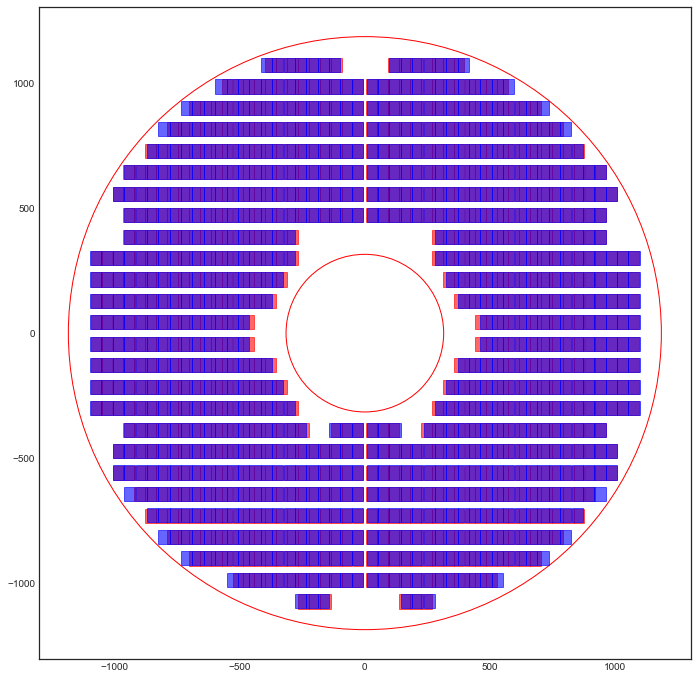

In [24]:
plt.rcParams['figure.figsize'] = [12, 12]

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

# df_original_back = df_original_back.loc[df_original_back['Module '] != 754]
# for x1,y1 in zip(df_original_back['X'],df_original_back['Y']):
#     x1,y1 = float(x1),float(y1)
#     m = Module(height=43.1,width=56.5,x=x1,y=y1)
#     plt.gca().add_patch(m.getPolygon2(color='blue'))
    
for x1,y1 in zip(df_original_front['X'],df_original_front['Y']):
    x1,y1 = float(x1),float(y1)
    m = Module(height=43.1,width=56.5,x=x1,y=y1)
    plt.gca().add_patch(m.getPolygon2(color='red'))
    
for x1,y1 in zip(df_config_3_front['X'],df_config_3_front['Y']):
    x1,y1 = float(x1),float(y1)
    m = Module(height=45,width=56.5,x=x1,y=y1)
    plt.gca().add_patch(m.getPolygon2(color='blue'))
plt.axis('scaled')

(-1303.5, 1303.5, -1303.5, 1303.5)

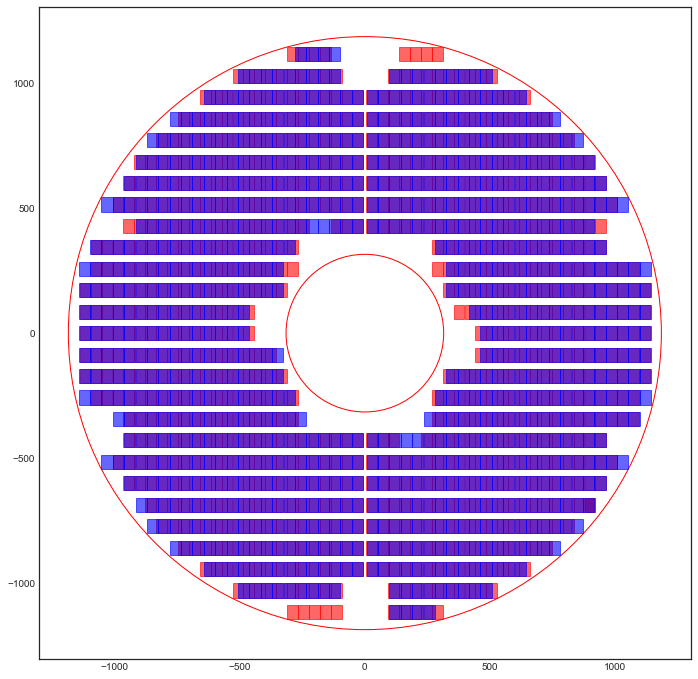

In [25]:
plt.rcParams['figure.figsize'] = [12, 12]

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

# X = [float(i) for i in df_original_back['X']]
# Y = [float(i) for i in df_original_back['Y']]
# modules_back_original = list(zip(X,Y))
# unique_y_original = list(set([float(i[1]) for i in modules_back_original]))
# unique_y_original.sort()
# modules_back_3 = list(zip(df_config_3_back['X'],df_config_3_back['Y']))
# unique_y_3 = list(set([float(i[1]) for i in modules_back_3]))
# unique_y_3.sort()

for x1,y1 in zip(df_original_back['X'],df_original_back['Y']):
    x1,y1 = float(x1),float(y1)
    m = Module(height=43.1,width=56.5,x=x1,y=y1)
    plt.gca().add_patch(m.getPolygon2(color='red'))
    
# for x1,y1 in zip(df_original_front['X'],df_original_front['Y']):
#     x1,y1 = float(x1),float(y1)
#     m = Module(height=43.1,width=56.5,x=x1,y=y1)
#     plt.gca().add_patch(m.getPolygon2(color='red'))
    
for x1,y1 in zip(df_config_3_back['X'],df_config_3_back['Y']):
    x1,y1 = float(x1),float(y1)
    m = Module(height=45,width=56.5,x=x1,y=y1)
    plt.gca().add_patch(m.getPolygon2(color='blue'))
plt.axis('scaled')

In [124]:
# for y in unique_y_original:
coors = list(filter(lambda x:float(x[1])==unique_y_original[1], modules_back_original))
print(sorted(coors))

[(-463.55, -1028.4), (-419.95, -1028.4), (-376.35, -1028.4), (-332.75, -1028.4), (-289.15, -1028.4), (-245.55, -1028.4), (-201.95, -1028.4), (-158.35, -1028.4), (-114.75, -1028.4), (114.75, -1028.4), (158.35, -1028.4), (201.95, -1028.4), (245.55, -1028.4), (289.15, -1028.4), (332.75, -1028.4), (376.35, -1028.4), (419.95, -1028.4), (463.55, -1028.4), (507.15, -1028.4)]


In [130]:
to_be_added = [(419.95,1028.4),(463.55,1028.4),(507.15,1028.4),
               (594.35,942.7),(637.95,942.7),(725.15,857.0),
               (812.35,771.3),(899.55,685.6),(1117.55,171.4),
               (-1117.55,171.4),(1117.55,85.7),(-1117.55,85.7),
               (1117.55,0),(-1117.55,0),(1117.55,-85.7),
               (-1117.55,-85.7),(1117.55,-171.4),(-1117.55,-171.4),
              (-376.35,-1028.4),(-419.95,-1028.4),(-463.55,-1028.4),
              (-594.35,-942.7),(-637.95,-942.7),(-725.15,-857),
              (-812.35,-771.3),(899.95,-685.6),(289.15,-1114.1),
              (114.75,-1114.1),(-114.75,-1114.1),(-158, -1114.1)
             ,(-201.95, -1114.1),(-245.55, -1114.1),(245.55, 1114.1),
               (201.95, 1114.1),(158.35, 1114.1), (289.15,1114.1),(-289.15,1114.1),
               (-289.15,-1114.1), (-507.15,-1028.4)]

In [131]:
modules_back_original += to_be_added

In [132]:
len(modules_back_original),len(list(zip(df_config_3_back['X'],df_config_3_back['Y'])))

(932, 932)

In [142]:
# new_X = [i[0] for i in modules_back_original]
# new_Y = [i[1] for i in modules_back_original]

# df_original_back['X'] = new_X

In [138]:
df_new = pd.DataFrame(modules_back_original, columns=['X','Y'])

In [139]:
df_new

,X,Y
0,158.35,-1114.1
1,201.95,-1114.1
2,245.55,-1114.1
3,114.75,-1028.4
4,158.35,-1028.4
...,...,...
927,158.35,1114.1
928,289.15,1114.1
929,-289.15,1114.1
930,-289.15,-1114.1


In [143]:
df_new.to_csv('Face 2 and 4 new original.txt')